In [38]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [39]:
# load the ms2 spectra for this feature in the APL
mq_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/index-95345.txt', sep='\t', header=None, names=['mz','intensity'], usecols=[0,1])


In [40]:
mq_df['norm_intensity'] = mq_df.intensity / mq_df.intensity.max() * 100

In [41]:
import pickle

In [42]:
with open('/Users/darylwilding-mcbride/Downloads/mgf_spectra.pkl', 'rb') as f:
        mgf_spectra_l = pickle.load(f)


In [56]:
mgf_spectra_l[0]

{'m/z array': array([ 426.2742,  673.373 ,  946.4097, 1076.5545]),
 'intensity array': array([122, 326, 140, 170]),
 'params': {'TITLE': 'RawFile: HeLa_20KInt Charge: 2 FeatureIntensity: 4133355 Feature#: 1 RtApex: 3018.45',
  'INSTRUMENT': 'ESI-QUAD-TOF',
  'PEPMASS': '673.392297 4133355',
  'CHARGE': '2+',
  'RTINSECONDS': '3018.45'}}

In [65]:
feature_id = 2

In [66]:
feature = next((x for x in mgf_spectra_l if 'Feature#: {}'.format(feature_id) in x['params']['TITLE']), None)

In [67]:
my_df = pd.DataFrame.from_dict(list((feature['m/z array'], feature['intensity array']))).T
my_df.columns = ['mz','intensity']

In [68]:
my_df.head()

,mz,intensity


In [55]:
my_df['norm_intensity'] = my_df.intensity / my_df.intensity.max() * 100

ValueError: zero-size array to reduction operation minimum which has no identity

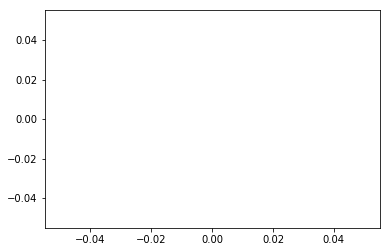

In [47]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
markerline, stemlines, baseline = ax.stem(my_df.mz, my_df.norm_intensity, 'g', label='Mine')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])
markerline, stemlines, baseline = ax.stem(mq_df.mz, -mq_df.norm_intensity, 'g', label='MaxQuant')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])
plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
ax.set_xlim((100,1900))
plt.margins(0.06)
plt.legend(loc='best')
# plt.suptitle('ms2 peaks for precursor ID {} (Index {})'.format(precursor_id, msms_scan_number))
plt.show()

In [ ]:
my_df.sort_values(by=['intensity'], ascending=False, inplace=True)
mq_df.sort_values(by=['intensity'], ascending=False, inplace=True)

In [ ]:
my_df.iloc[2].mz_plus_h - mq_df.iloc[1].mz_plus_h

In [ ]:
my_df.head(10)

In [ ]:
mq_df.head(10)